# Introduction

Dynamic models are essential for understanding the system dynamics in open-loop (manual mode) or for closed-loop (automatic) control. These models are either derived from data (empirical) or from more fundamental relationships (first principles, physics-based) that rely on knowledge of the process. A combination of the two approaches is often used in practice where the form of the equations are developed from fundamental balance equations and unknown or uncertain parameters are adjusted to fit process data.

In engineering, there are 4 common balance equations from conservation principles including mass, momentum, energy, and species (see Balance Equations). An alternative to physics-based models is to use input-output data to develop empirical dynamic models such as first-order or second-order systems.

### Steps in Dynamic Modeling
The following are general guidelines for developing a dynamic model. The process is iterative as simulation results help inform modeling assumptions or correct errors in the dynamic balance equations.

* Identify objective for the simulation
* Draw a schematic diagram, labeling process variables
* List all assumptions
* Determine spatial dependence
  * yes = Partial Differential Equation (PDE)
  * no = Ordinary Differential Equation (ODE)
* Write dynamic balances (mass, species, energy)
* Other relations (thermo, reactions, geometry, etc.)
* Degrees of freedom, does number of equations = number of unknowns?
* Classify inputs as
  * Fixed values
  * Disturbances
  * Manipulated variables
* Classify outputs as
  * States
  * Controlled variables
* Simplify balance equations based on assumptions
* Simulate steady state conditions (if possible)
* Simulate the output with an input step

### Example 

Consider a cylindrical tank with no outlet flow and an adjustable inlet flow. The inlet flow rate is not measured but there is a level measurement that shows how much fluid has been added to the tank. The objective of this exercise is to develop a model that can maintain a certain water level by automatically adjusting the inlet flow rate. 

<img src="pictures/tank_model_no_outlet.png" width="200">


A first step is to develop a dynamic model of how the inlet flow rate affects the level in the tank. A starting point for this model is a balance equation.

$$\frac{dm}{dt}=\dot{m}_{in} − \dot{m}_{out}$$

The accumulation term is a differential variable such as $dm/dt$ for mass. In this case, the accumulation of mass is equal to only an inlet flow and no outlet, generation, or consumption terms.

### Assumptions
The next objective is to simplify the expression and transform it into a relationship between height $h$ and the valve opening $u$ (0-100%). For liquid water, density is nearly constant even over wide temperature ranges and the mass is equal to the density multiplied by the volume $V$. Assuming a constant cross-sectional area gives $V = hA$ and a linear correlation between valve opening and inlet flow gives the following relationship.

$$ ρA\frac{dh}{dt} = cu \quad{} \text{with} \quad{} \dot{m}_{in}=cu$$

where $c$ is a constant that relates valve opening to inlet flow.

### Problem
Simulate the height of the tank by integrating the mass balance equation for a period of 10 seconds. The valve opens to 100% at $t=2s$ and shuts at $t=7s$. Use a value of $1000$ kg/m3 for density and $1.0$ m2 for the cross-sectional area of the tank. For the valve, assume a valve coefficient of $c=50.0$ (kg/s / %open).

In [9]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [10]:
# Define tank model
def tank(Level,time,c,valve):
    rho = 1000.0 # water density (kg/m^3)
    A = 1.0      # tank area (m^2)
    dLevel_dt = (c/(rho*A)) * valve # calculate derivative of the Level
    return dLevel_dt

In [11]:
# Time span for the simulation for 10 sec, every 0.1 sec
ts = np.linspace(0,10,101)

In [12]:
# Valve operation
c = 50.0          # valve coefficient (kg/s / %open)
u = np.zeros(101) # u = valve % open
u[21:70] = 100.0  # open valve between 2 and 7 seconds

In [13]:
# Level initial condition
Level0 = 0

In [14]:
# For storing the results
z = np.zeros(101)

In [15]:
# Simulate with ODEINT
for i in range(100):
    valve = u[i+1]
    y = odeint(tank,Level0,[0,0.1],args=(c,valve))
    Level0 = y[-1] # take the last point
    z[i+1] = Level0 # store the level for plotting

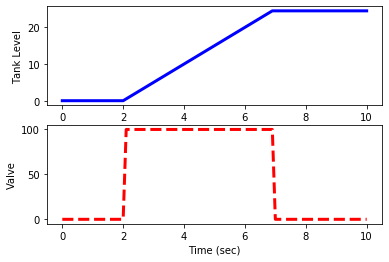

In [16]:
# Plot results
plt.figure()
plt.subplot(2,1,1)
plt.plot(ts,z,'b-',linewidth=3)
plt.ylabel('Tank Level')
plt.subplot(2,1,2)
plt.plot(ts,u,'r--',linewidth=3)
plt.ylabel('Valve')    
plt.xlabel('Time (sec)')
plt.show()